# 干扰应用分析

In [1]:
import sys
sys.path.append('./tools')

from aggregation import *
import analyze
import display

exp_roots = {
    "stresses": [
        "/home/ict/appProfile/data/stress/same_cpu/cache_no_20231031130519",
        "/home/ict/appProfile/data/stress/same_cpu/cpu_no_20231031132213",
        "/home/ict/appProfile/data/stress/same_cpu/io_no_20231031133331",
        "/home/ict/appProfile/data/stress/same_cpu/vm_no_20231031135026",
        "/home/ict/appProfile/data/redis/same_numa/redis_cache_20231101033312",
    ]
}

## 一、Cache

In [2]:
exp_root = exp_roots["stresses"][0]

exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs([
    filter_column_startswith(col_prefix=("container")),
    filter_column_useless(),
    filter_row_noise(col_prefix=("container")),
]).workload_keys()

['cache_0', 'cache_1', 'cache_2', 'cache_3', 'cache_4', 'cache_5']

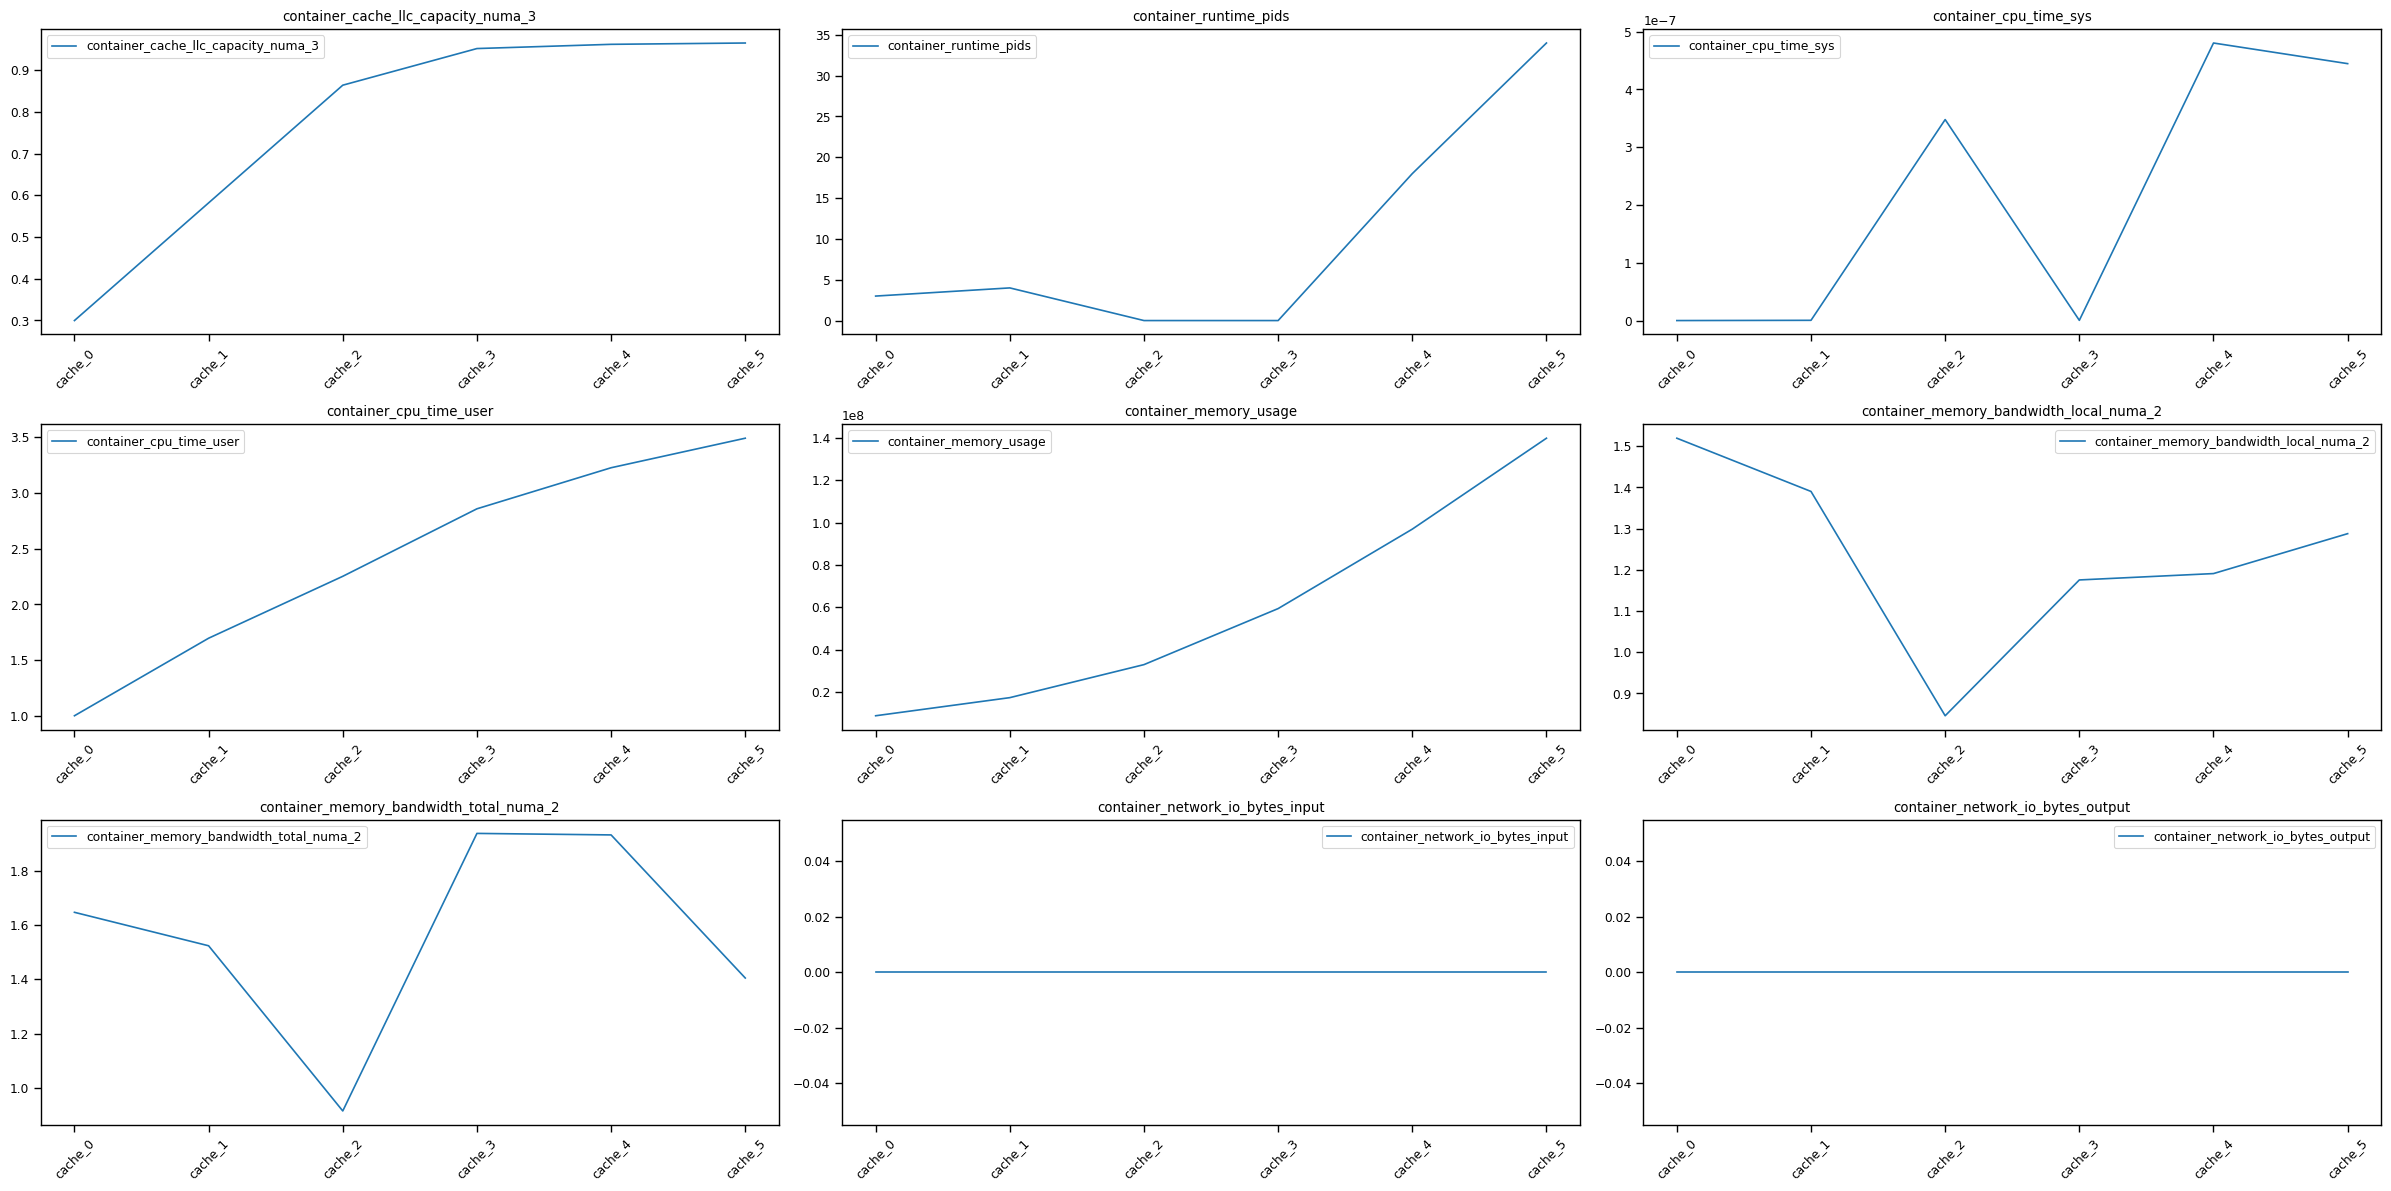

Index(['container_cache_llc_capacity_numa_3', 'container_runtime_pids',
       'container_cpu_time_sys', 'container_cpu_time_user',
       'container_memory_usage', 'container_memory_bandwidth_local_numa_2',
       'container_memory_bandwidth_total_numa_2',
       'container_network_io_bytes_input',
       'container_network_io_bytes_output'],
      dtype='object')

In [3]:
df_epoch = exp_data.agg_epoch()
display.plt_by_column(df_epoch)
df_epoch.columns

In [10]:
column = df_epoch.columns[0]
# 临时处理
# column = "container_network_io_bytes_input"
#
df = exp_data.one_column_on_workloads(column)
display.plt_box(df, "", column)

KeyError: 'container_network_io_bytes_input'

## 二、CPU

In [11]:
exp_root = exp_roots["stresses"][1]

exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs([
    filter_column_startswith(col_prefix=("container")),
    filter_column_useless(),
    filter_row_noise(col_prefix=("container")),
]).workload_keys()

['cpu_0', 'cpu_1', 'cpu_2', 'cpu_3']

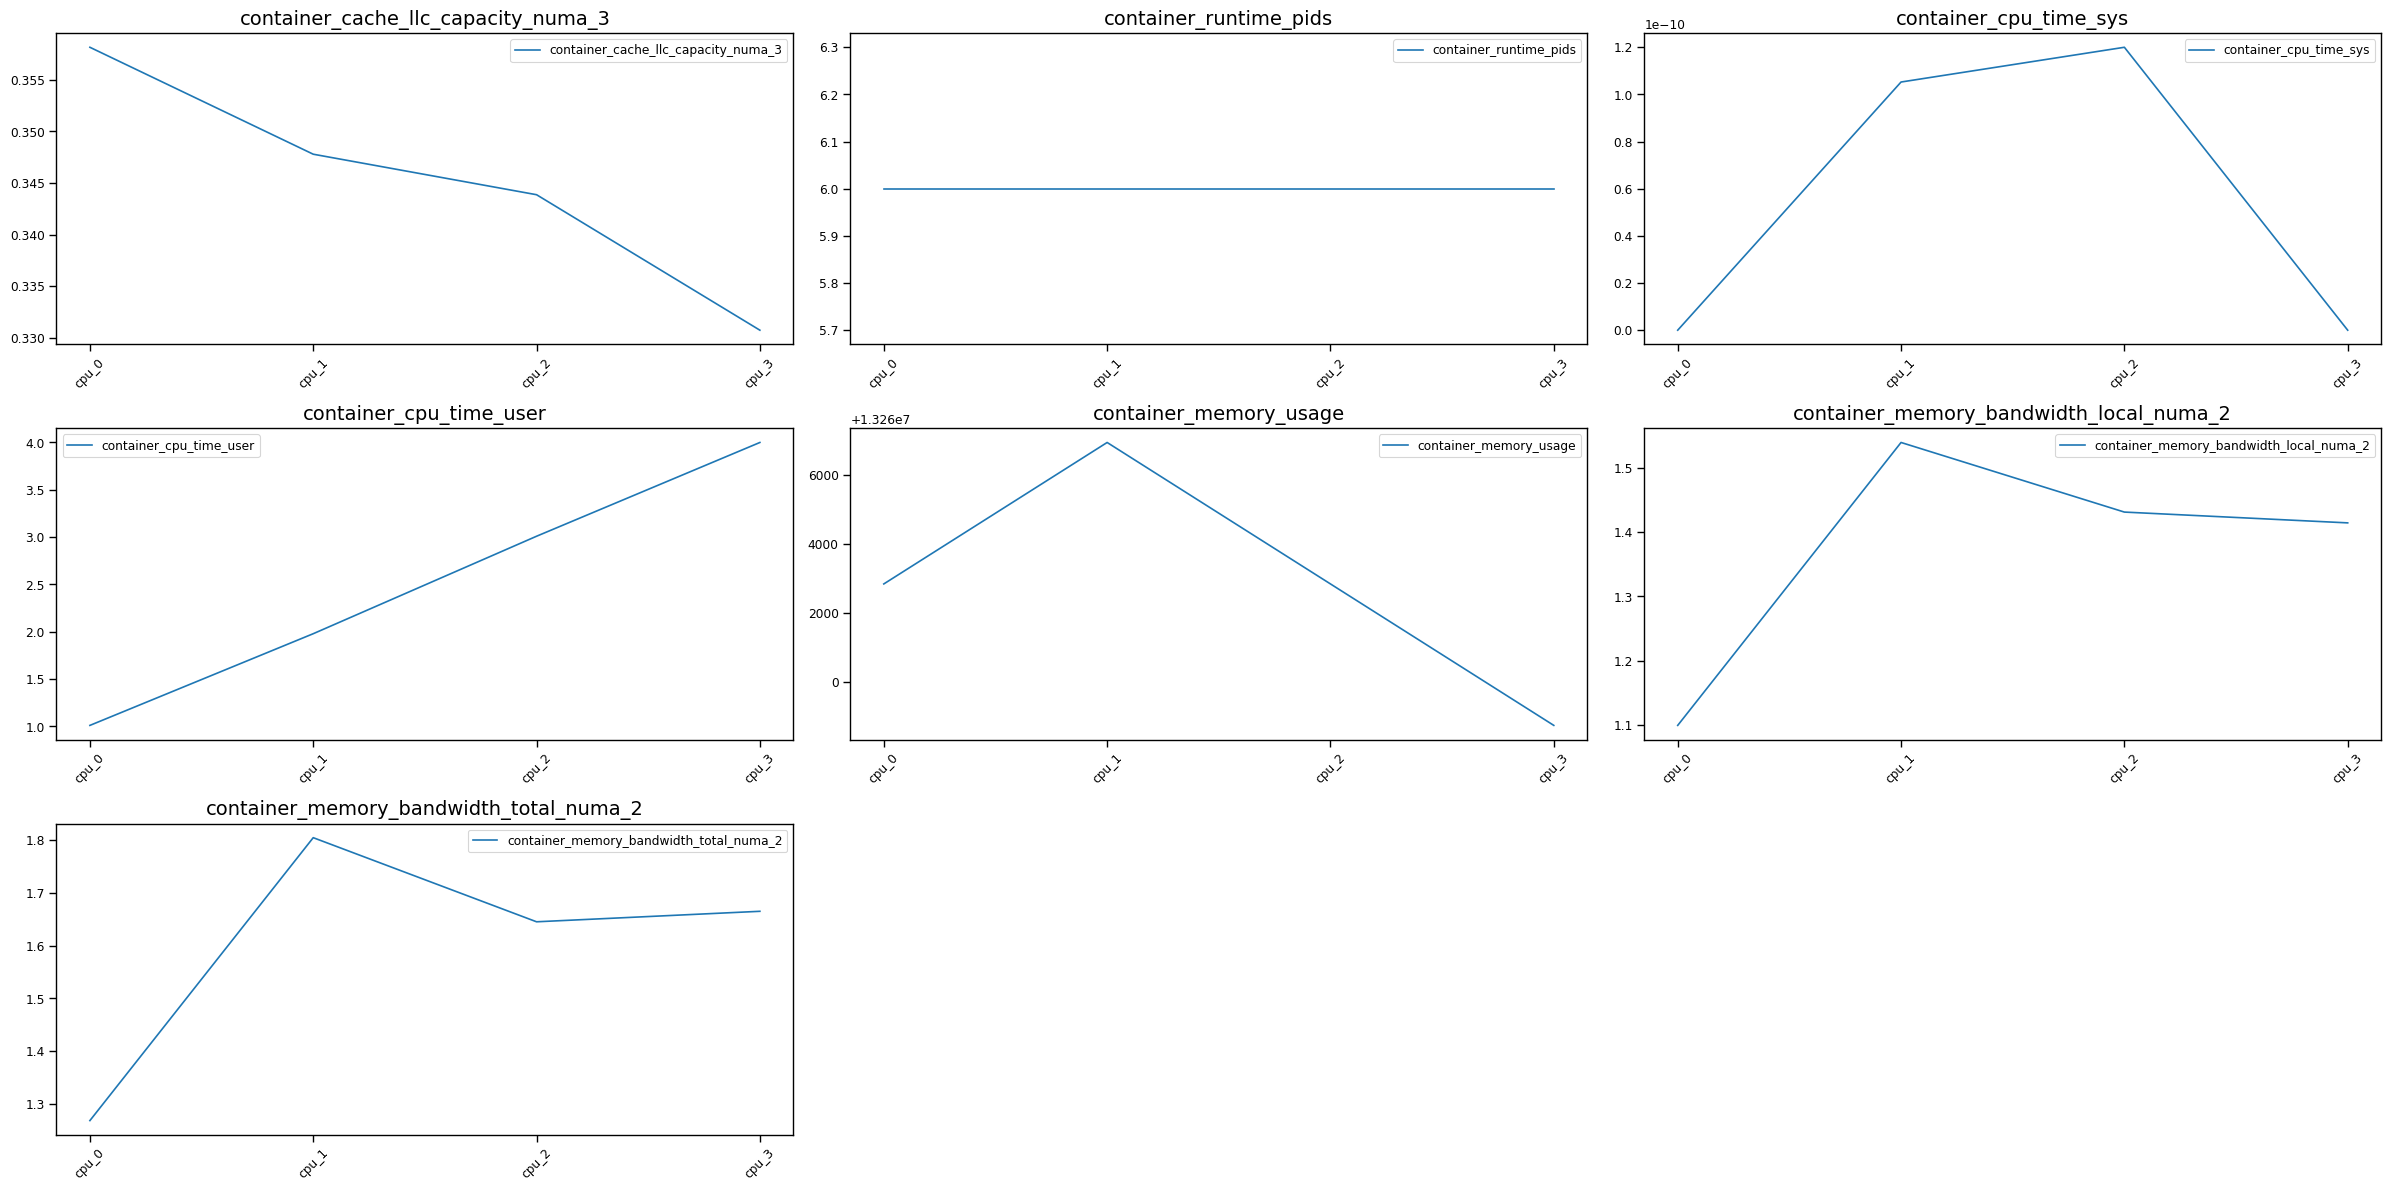

Index(['container_cache_llc_capacity_numa_3', 'container_runtime_pids',
       'container_cpu_time_sys', 'container_cpu_time_user',
       'container_memory_usage', 'container_memory_bandwidth_local_numa_2',
       'container_memory_bandwidth_total_numa_2'],
      dtype='object')

In [12]:
df_epoch = exp_data.agg_epoch()
display.plt_by_column(df_epoch)
df_epoch.columns

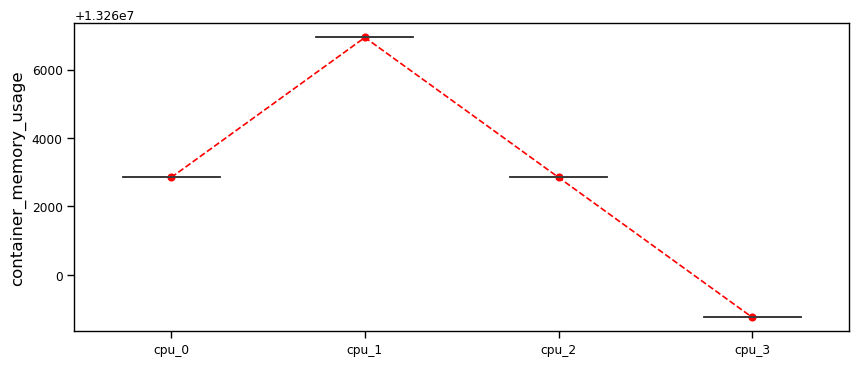

In [16]:
column = df_epoch.columns[3]
# 临时处理
column = "container_memory_usage"
#
df = exp_data.one_column_on_workloads(column)
display.plt_box(df, "", column)

## 三、IO

In [17]:
exp_root = exp_roots["stresses"][2]

exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs([
    filter_column_startswith(col_prefix=("container")),
    filter_column_useless(),
    filter_row_noise(col_prefix=("container")),
]).workload_keys()

['io_0', 'io_1', 'io_2', 'io_3', 'io_4', 'io_5']

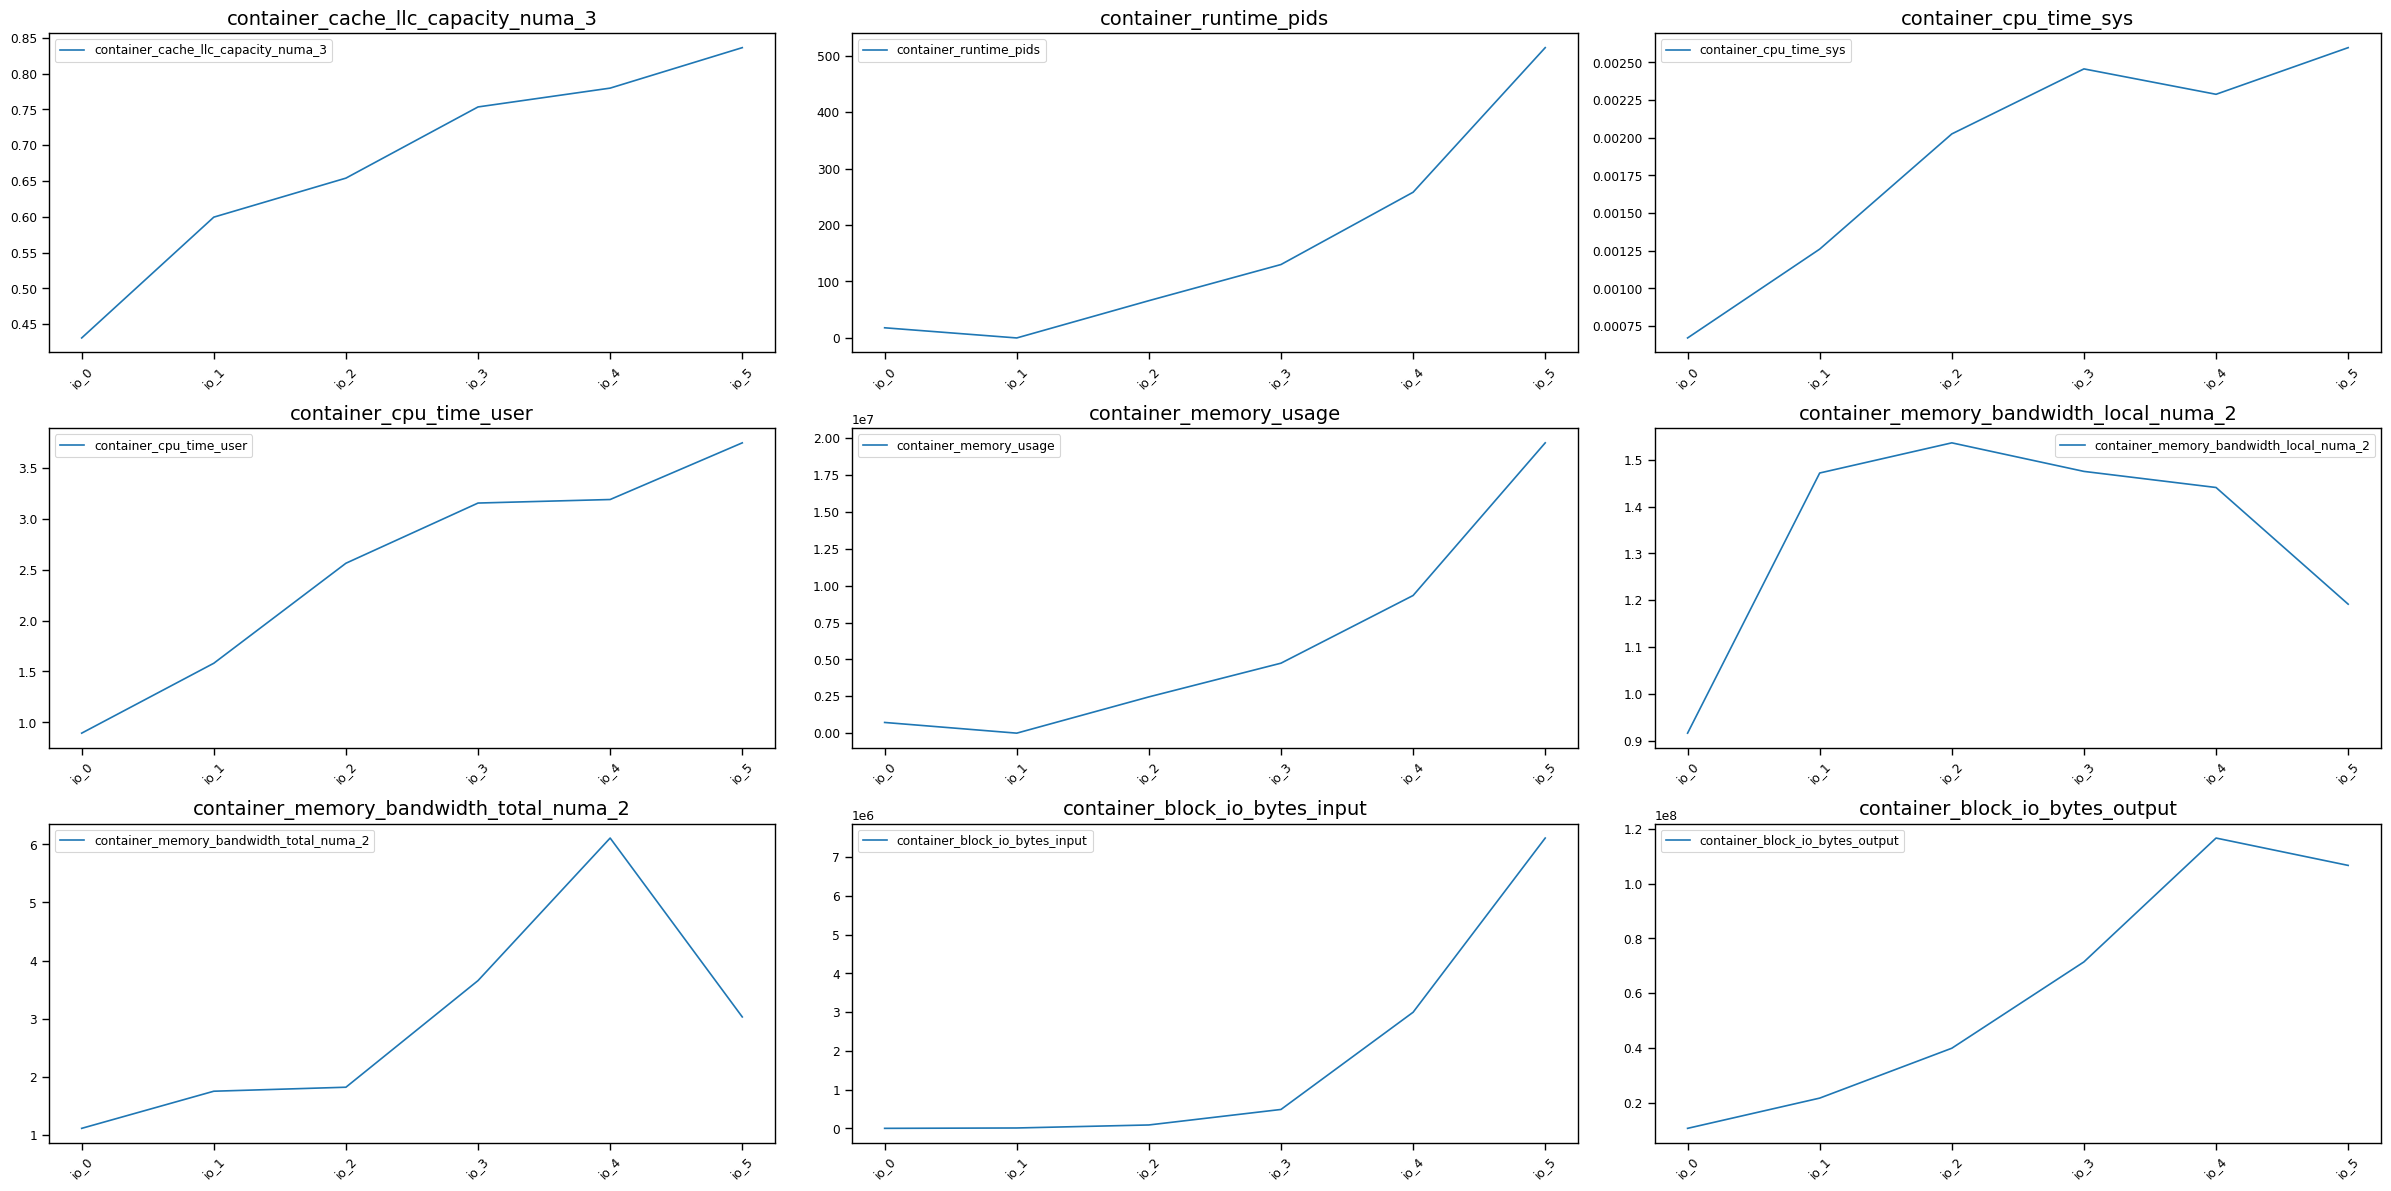

Index(['container_cache_llc_capacity_numa_3', 'container_runtime_pids',
       'container_cpu_time_sys', 'container_cpu_time_user',
       'container_memory_usage', 'container_memory_bandwidth_local_numa_2',
       'container_memory_bandwidth_total_numa_2',
       'container_block_io_bytes_input', 'container_block_io_bytes_output'],
      dtype='object')

In [18]:
df_epoch = exp_data.agg_epoch()
display.plt_by_column(df_epoch)
df_epoch.columns

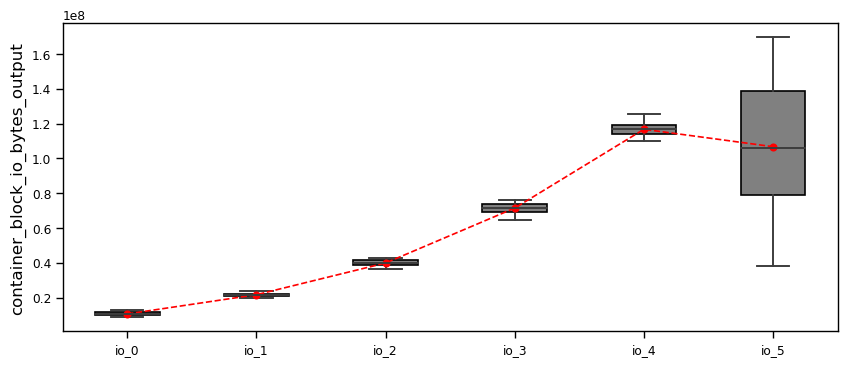

In [23]:
column = df_epoch.columns[-2]
# 临时处理
column = "container_block_io_bytes_output"
#
df = exp_data.one_column_on_workloads(column)
display.plt_box(df, "", column)

## 四、VM

In [24]:
exp_root = exp_roots["stresses"][3]

exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs([
    filter_column_startswith(col_prefix=("container")),
    filter_column_useless(),
    filter_row_noise(col_prefix=("container")),
]).workload_keys()

['vm_0', 'vm_1', 'vm_2', 'vm_3', 'vm_4', 'vm_5']

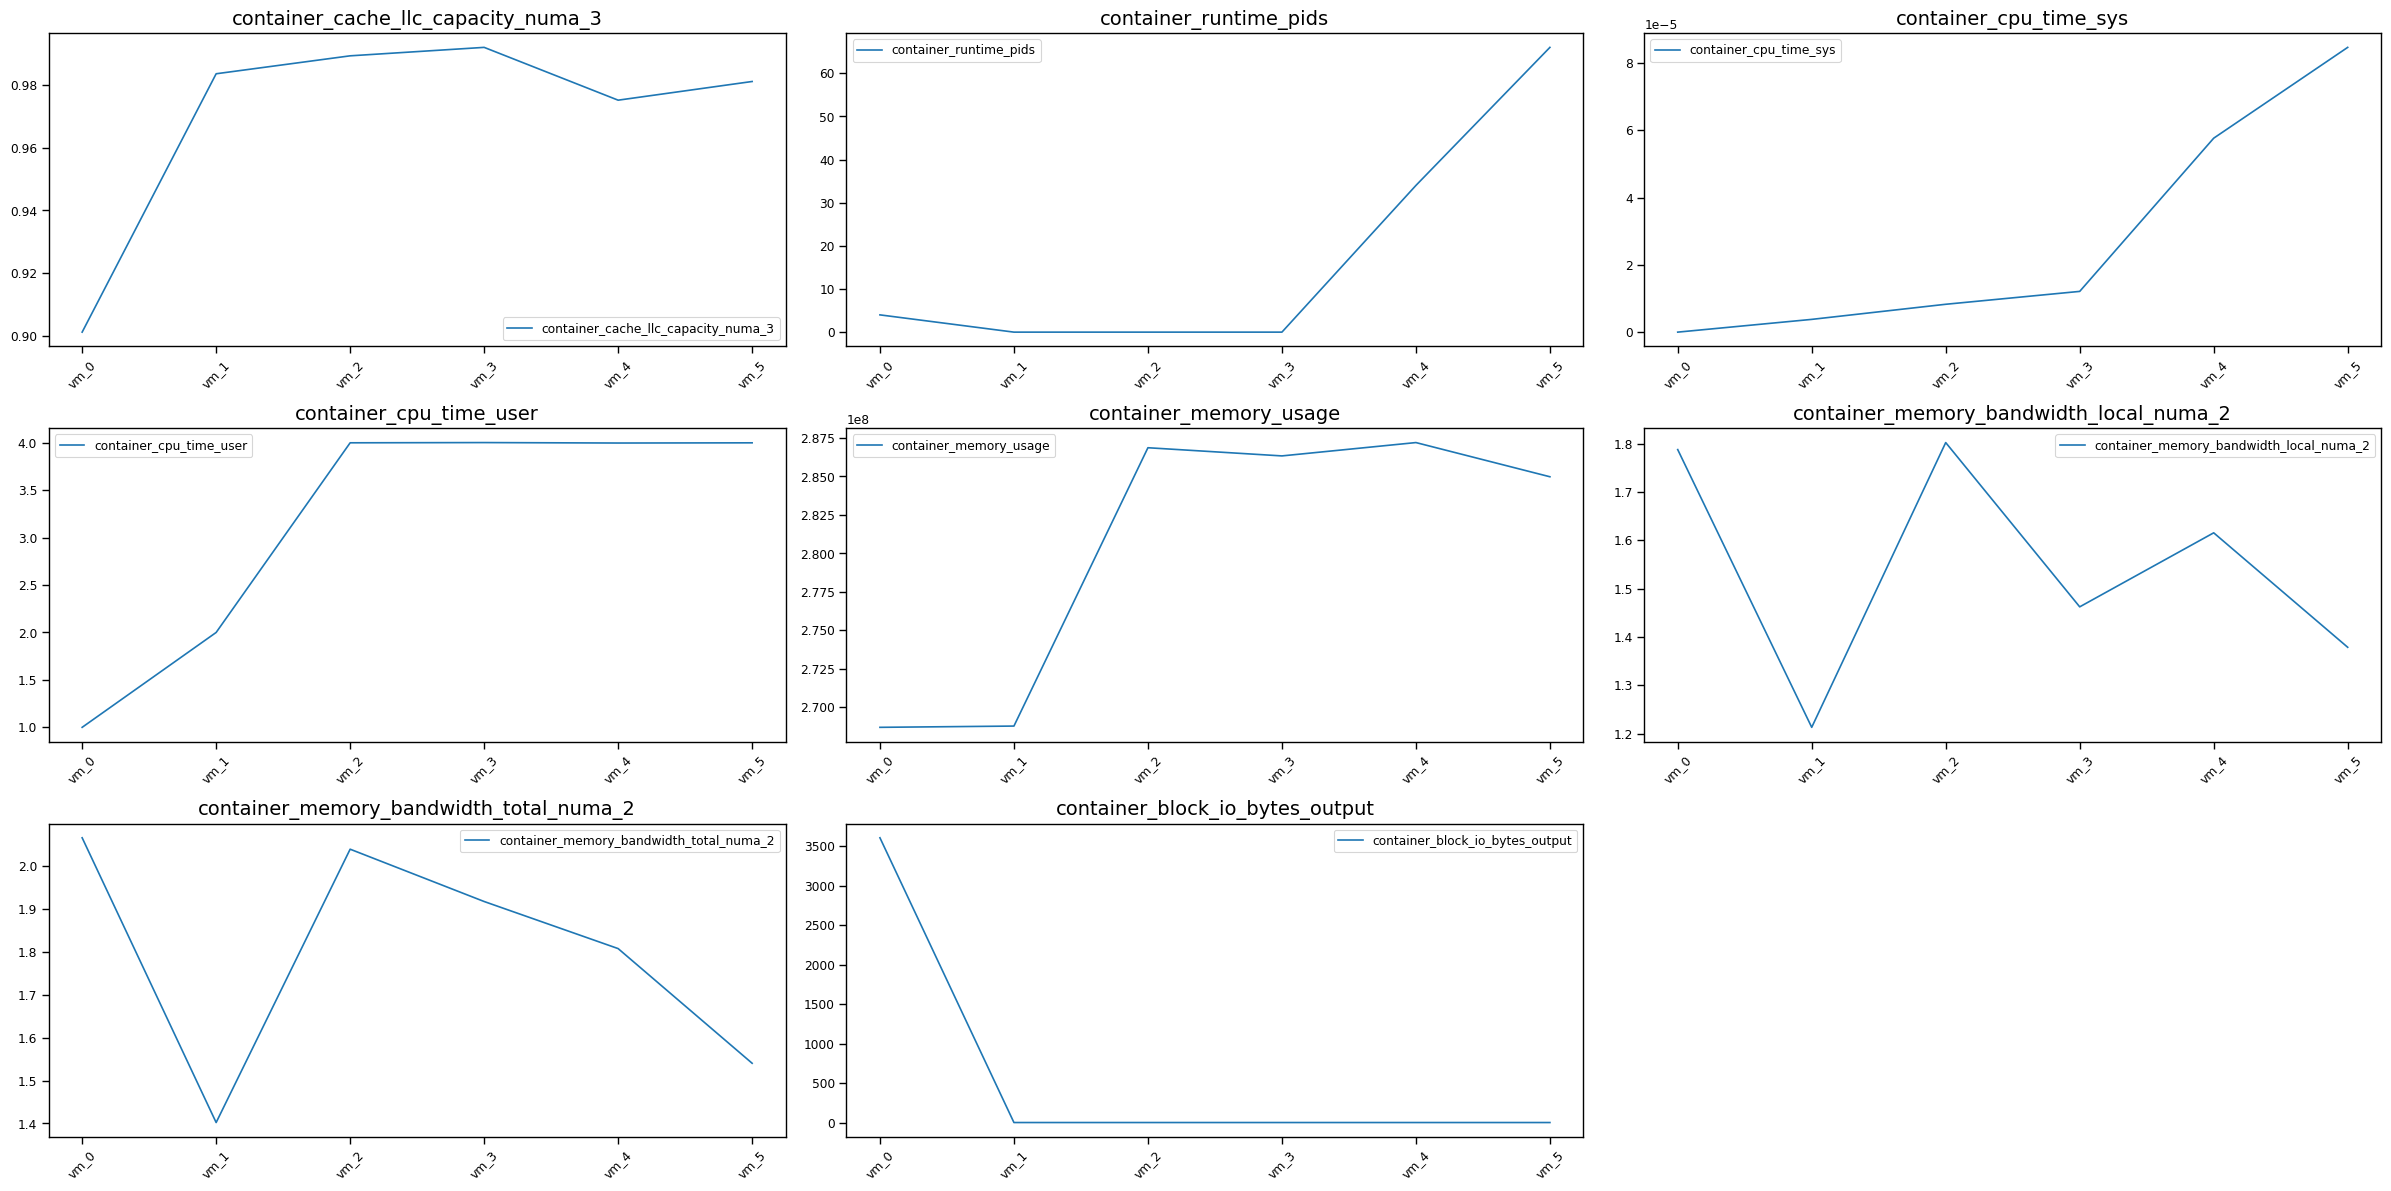

Index(['container_cache_llc_capacity_numa_3', 'container_runtime_pids',
       'container_cpu_time_sys', 'container_cpu_time_user',
       'container_memory_usage', 'container_memory_bandwidth_local_numa_2',
       'container_memory_bandwidth_total_numa_2',
       'container_block_io_bytes_output'],
      dtype='object')

In [25]:
df_epoch = exp_data.agg_epoch()
display.plt_by_column(df_epoch)
df_epoch.columns

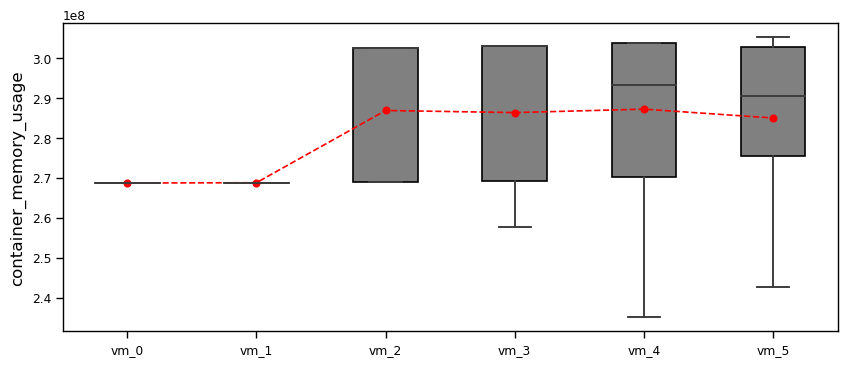

In [32]:
column = df_epoch.columns[0]
# 临时处理
column = "container_memory_usage"
#
df = exp_data.one_column_on_workloads(column)
display.plt_box(df, "", column)

In [ ]:
# exp_root = "/home/ict/appProfile/data/stress_test/same_cpuset/net_no_20231026122017"
# plt_per_column(exp_root)